In [2]:
import random
import math
from matplotlib import pyplot

def euclidian_distance(x1,y1,x2,y2):
    return math.sqrt((y1-y2)**2 + (x1-x2)**2)

def vector_addiction(vector1, vector2):
    return [i+j for i,j in zip(vector1, vector2)]

def scalar_multiplication(vector, scalar):
    return [scalar*i for i in vector]

def index_where_equals(vector, value):
    return [i for i in range(len(vector)) if vector[i] == value]

def random_list(no,minimum=0,maximum=100):
    return [random.randint(minimum, maximum) for i in range(no)]

In [21]:
class KMeans:
    def __init__(self,clusters = 2):
        self.clusters = clusters
        
    def fit(self ,x,y, iterations=5):
        self.x = x
        self.y = y
        
        x_min, x_max = min(x), max(x)
        y_min, y_max = min(x), max(x)
    
        self.cluster_center = [[random.randint(x_min, x_max),random.randint(y_min, y_max )] for i in range(self.clusters)]

        for i in range(iterations):
            self.assign_cluster()
            self.visualize(str(i)+'assign')
            self.relocate_clusters()
            self.visualize(str(i)+'relocate')
        
        self.assign_cluster()
        
    def slow_fit(self, x,y):
        self.x = x
        self.y = y
        
        x_min, x_max = min(x), max(x)
        y_min, y_max = min(x), max(x)
    
        self.cluster_center = [[random.randint(x_min, x_max),random.randint(y_min, y_max )] for i in range(self.clusters)]

    def nearest_cluster(self,x,y):
        min_cluster = None
        min_distance = None
        
        for i in range(len(self.cluster_center)):
            cluster_x, cluster_y = self.cluster_center[i]
            
            distance = euclidian_distance(cluster_x, cluster_y, x, y)
            
            if not min_distance or min_distance > distance:
                min_distance = distance
                min_cluster = i
        
        return min_cluster
    
    def assign_cluster(self):
        self.cluster_assignment = []
        
        for i in range(len(self.x)):
            self.cluster_assignment.append(self.nearest_cluster(self.x[i], self.y[i]))
        
        return self.cluster_assignment
    
    def relocate_clusters(self):
        temp = {}
        
        no_of_points_in_cluster = {}
        
        for cluster_no,i,j in zip(self.cluster_assignment,x,y):
            temp.setdefault(cluster_no,[0,0])
            temp[cluster_no] = vector_addiction(temp[cluster_no],[i,j])
            
            no_of_points_in_cluster.setdefault(cluster_no, 0)
            no_of_points_in_cluster[cluster_no] += 1
        
        for key, value in temp.items():
            self.cluster_center[key] = scalar_multiplication(value, 1/no_of_points_in_cluster[key])
        
        return self.cluster_center
    
    def visualize(self, save_name = None):
        graph = pyplot
        graph.clf()
        cluster_x = [i[0] for i in self.cluster_center]
        cluster_y = [i[1] for i in self.cluster_center]
        
        colors = ['r', 'b', 'g', 'k', 'm']
        markers = ['P','v','*','s','X']

        for i in range(len(self.cluster_center)):
            point_no = index_where_equals(self.cluster_assignment,i)
            
            x = [self.x[i] for i in point_no]
            y = [self.y[i] for i in point_no]
            graph.scatter(x, y, c= colors[i])

            graph.scatter([cluster_x[i]], [cluster_y[i]],c=colors[i], marker = markers[i])
        
        
        if save_name:
            graph.title = save_name
            graph.savefig('/Users/ankushchoubey/Desktop/'+str(save_name) +'.png')

[16, 34, 34, 34, 0, 13, 28, 7, 31, 39, 84, 80, 89, 93, 99, 88, 80, 98, 97, 82, 80, 59, 52, 11, 14, 98, 17, 32, 9, 48, 26, 71, 76, 73, 30, 95, 65, 33, 11, 1]
[24, 30, 21, 31, 21, 13, 36, 32, 32, 0, 83, 89, 86, 96, 88, 95, 88, 88, 82, 85, 19, 20, 42, 21, 65, 53, 32, 60, 19, 75, 4, 57, 5, 99, 91, 32, 62, 75, 14, 76]


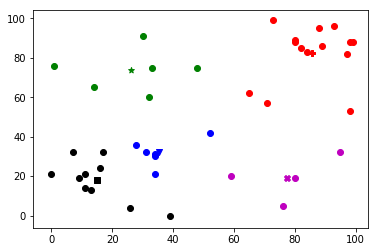

In [35]:
no_of_points = 10
x = random_list(no_of_points,0,40) + random_list(no_of_points,80,100) + random_list(no_of_points+10,0,100)
y = random_list(no_of_points,0,40) + random_list(no_of_points,80,100) + random_list(no_of_points+10,0,100)


print(x)
print(y)
engine = KMeans(5)
engine.fit(x,y, 10)

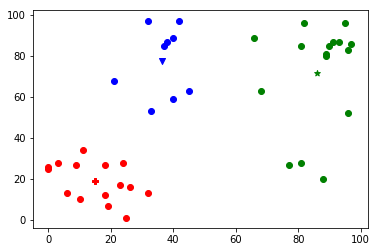

In [29]:
%matplotlib inline
engine.visualize()

In [310]:
# check it step by step
engine_slow = KMeans(2)
engine_slow.slow_fit(x,y)

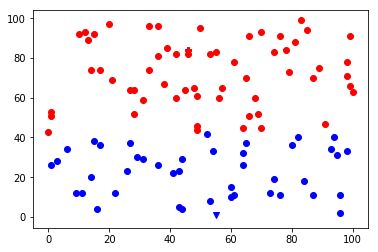

In [303]:
engine_slow.assign_cluster()
%matplotlib inline
engine_slow.visualize()

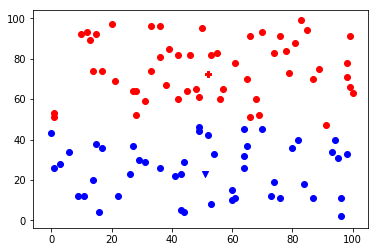

In [304]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

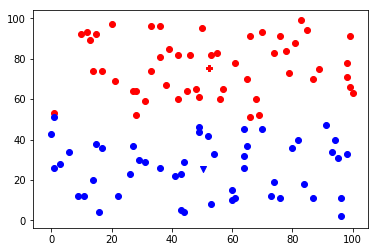

In [305]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

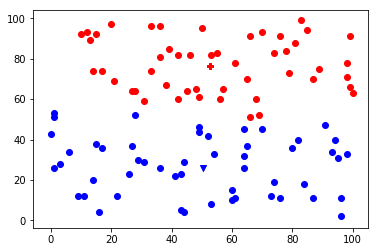

In [306]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

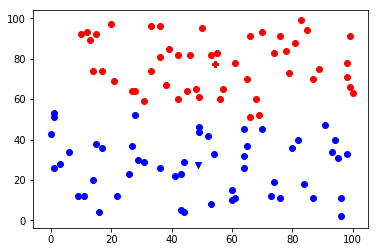

In [307]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

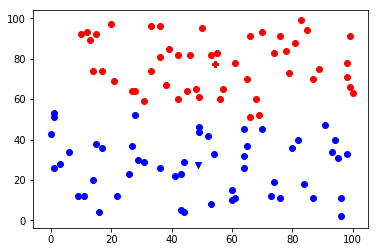

In [308]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()

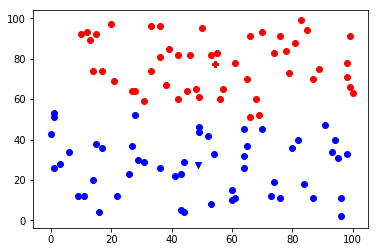

In [309]:
%matplotlib inline
engine_slow.relocate_clusters()
engine_slow.assign_cluster()
engine_slow.visualize()